<a href="https://colab.research.google.com/github/Anuj-1996/Correlation_Indian_Equities/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter date start date in: yy-mm-dd
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


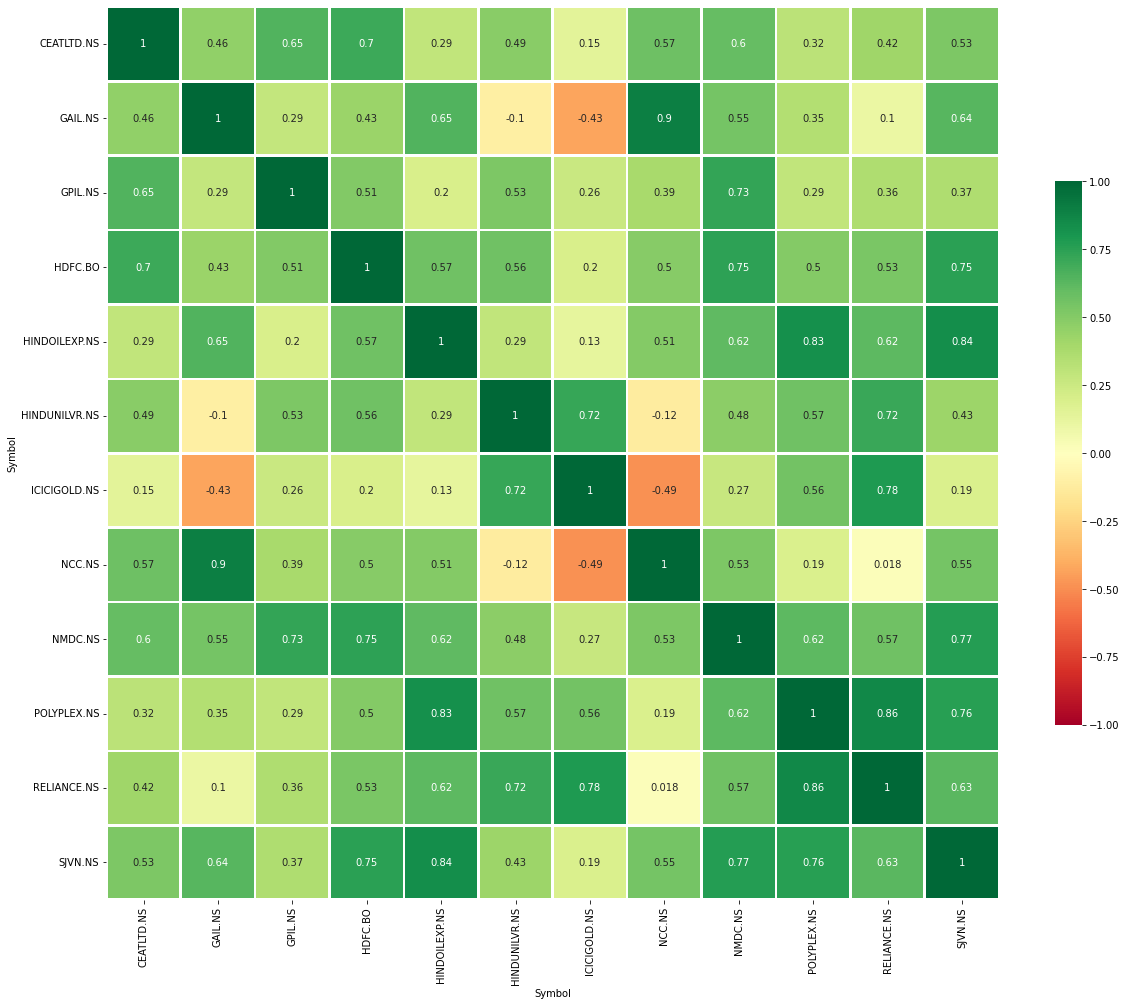

In [ ]:
import numpy as np
import pandas as pd
 #used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
 #to visualize the results
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
#select start date for correlation window as well as list of tickers

print('Enter date start date in: yy-mm-dd')
start= '2019-01-01'
today= datetime.today().strftime('%Y-%m-%d')
symbols_list = ['NMDC.NS','RELIANCE.NS','HDFC.BO', 'HINDUNILVR.NS','GPIL.NS', 'GAIL.NS','HINDOILEXP.NS', 'NCC.NS', 'SJVN.NS', 'POLYPLEX.NS', 'CEATLTD.NS', 'ICICIGOLD.NS']
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = pdr.get_data_yahoo(ticker, data_source='yahoo', start= start, end= today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()


df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()

import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()



In [ ]:
matrix = df_pivot.corr()
corr_pairs = matrix.unstack()
#matrix = matrix[matrix < 0.2]
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[(sorted_pairs) <= 0.1 ]


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(strong_pairs)


Symbol         Symbol       
ICICIGOLD.NS   NCC.NS          -0.487647
NCC.NS         ICICIGOLD.NS    -0.487647
GAIL.NS        ICICIGOLD.NS    -0.425319
ICICIGOLD.NS   GAIL.NS         -0.425319
NCC.NS         HINDUNILVR.NS   -0.120905
HINDUNILVR.NS  NCC.NS          -0.120905
GAIL.NS        HINDUNILVR.NS   -0.104892
HINDUNILVR.NS  GAIL.NS         -0.104892
RELIANCE.NS    NCC.NS           0.018396
NCC.NS         RELIANCE.NS      0.018396
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
    
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

dp = pd.DataFrame(df_pivot)

cor_matrix = dp.corr()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.2)]
list_1 = to_drop
list_2 = symbols_list


for element in list_1:
    if element in list_2:
        list_2.remove(element)

print(list_2)



['GAIL.NS', 'CEATLTD.NS']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


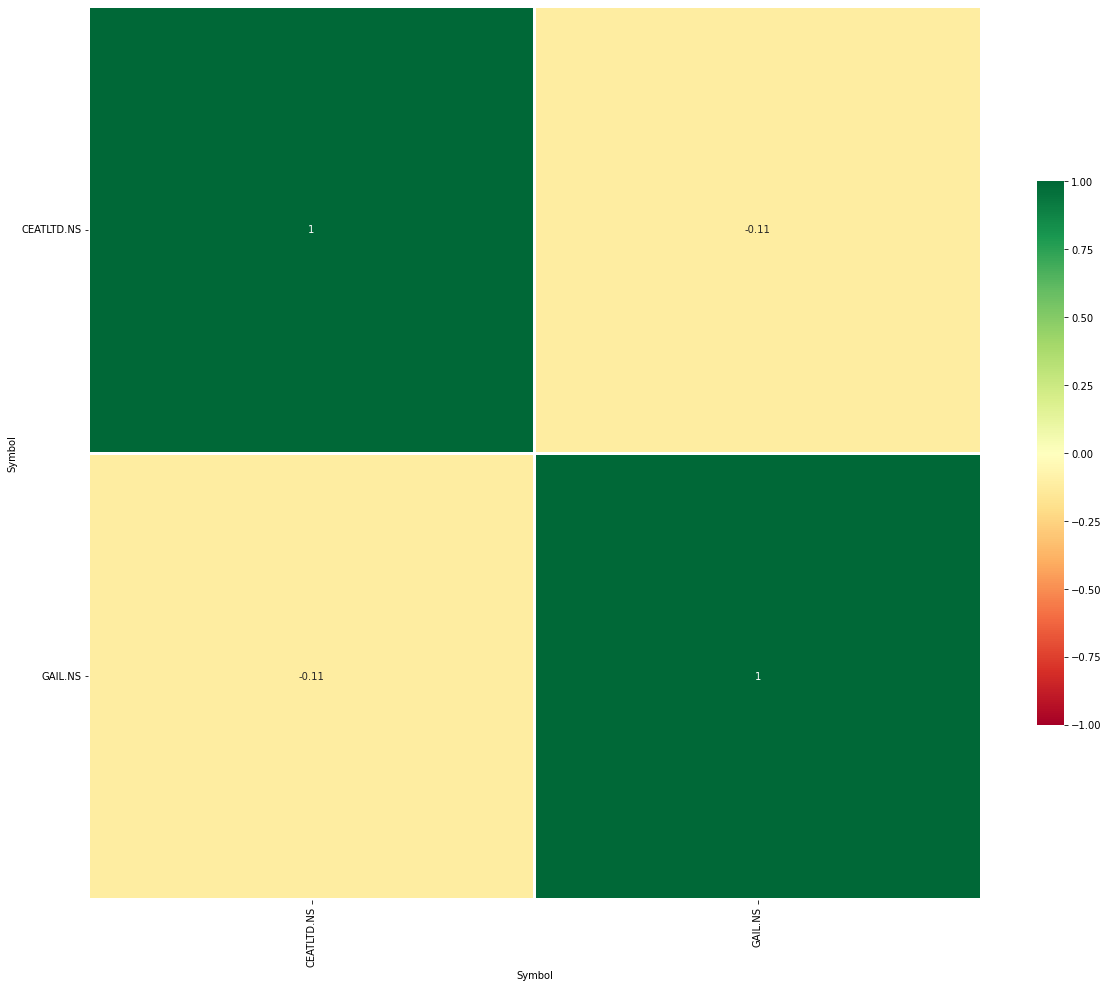

In [ ]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in list_2: 
    r = pdr.get_data_yahoo(ticker, data_source='yahoo', start= start, end= today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()


df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()

import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()


## **Itteration 1: After Removing highly correlated Assets 87%**


In [ ]:
import numpy as np
import pandas as pd
 #used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
 #to visualize the results
import matplotlib.pyplot as plt
import seaborn
#select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list_2 = list_2
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list_2: 
    r = pdr.get_data_yahoo(ticker, data_source='yahoo', start= start, end= today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]

df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()
corrM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Symbol,CEATLTD.NS,GAIL.NS,GPIL.NS,HDFC.BO,HINDOILEXP.NS,HINDUNILVR.NS,ICICIGOLD.NS,NCC.NS,NMDC.NS,POLYPLEX.NS,RELIANCE.NS,SJVN.NS
Symbol,,,,,,,,,,,,
CEATLTD.NS,1.000000,-0.111531,0.454536,0.472846,-0.694704,0.322806,-0.695174,0.705978,0.050705,-0.731031,-0.596494,-0.389999
GAIL.NS,-0.111531,1.000000,0.230088,-0.066647,0.279427,-0.016944,0.125041,0.228727,0.596425,0.283114,0.330480,0.302214
GPIL.NS,0.454536,0.230088,1.000000,0.199429,-0.405879,0.340045,-0.453536,0.651204,0.642380,-0.430372,-0.532970,-0.302305
HDFC.BO,0.472846,-0.066647,0.199429,1.000000,-0.105706,0.422220,-0.605630,0.567222,0.137428,-0.437390,-0.181763,0.052084
HINDOILEXP.NS,-0.694704,0.279427,-0.405879,-0.105706,1.000000,-0.004814,0.372970,-0.374923,-0.015373,0.813303,0.824520,0.643976
HINDUNILVR.NS,0.322806,-0.016944,0.340045,0.422220,-0.004814,1.000000,-0.342026,0.215612,-0.039913,-0.087309,-0.000738,-0.031571
ICICIGOLD.NS,-0.695174,0.125041,-0.453536,-0.605630,0.372970,-0.342026,1.000000,-0.737238,-0.183410,0.655049,0.494524,0.213900
NCC.NS,0.705978,0.228727,0.651204,0.567222,-0.374923,0.215612,-0.737238,1.000000,0.548463,-0.519414,-0.423516,-0.017850
NMDC.NS,0.050705,0.596425,0.642380,0.137428,-0.015373,-0.039913,-0.183410,0.548463,1.000000,-0.074614,-0.171919,0.169462


In [ ]:
import pandas as pd
import numpy as np
    
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

dp = pd.DataFrame(df_pivot)
print(dp.head())
cor_matrix = dp.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop_1 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.20)]
print(); print(to_drop_1)


Symbol       Date   CEATLTD.NS     GAIL.NS     GPIL.NS      HDFC.BO  \
0      2021-01-01  1093.449951  123.650002  498.200012  2569.649902   
1      2021-01-04  1134.050049  128.000000  523.099976  2579.350098   
2      2021-01-05  1154.400024  129.300003  537.049988  2651.149902   
3      2021-01-06  1146.050049  134.000000  517.750000  2636.350098   
4      2021-01-07  1153.699951  133.449997  533.349976  2661.600098   

Symbol  HINDOILEXP.NS  HINDUNILVR.NS  ICICIGOLD.NS     NCC.NS     NMDC.NS  \
0           87.400002    2387.550049     44.759998  60.849998  116.349998   
1           84.150002    2426.500000     45.459999  63.849998  122.400002   
2           85.550003    2450.550049     45.840000  63.099998  120.949997   
3           86.750000    2417.300049     46.009998  61.650002  123.250000   
4           86.800003    2368.850098     45.380001  62.650002  127.949997   

Symbol  POLYPLEX.NS  RELIANCE.NS    SJVN.NS  
0        717.349976  1987.500000  25.100000  
1        701.70001

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [ ]:
list_3 = to_drop_1
list_4 = symbols_list_2

for element in list_3:
    if element in list_4:
        list_4.remove(element)

print(list_4)

['HDFC.BO', 'HINDUNILVR.NS', 'GPIL.NS', 'GAIL.NS', 'CEATLTD.NS']


## **Itteration 2:  Removing highly correlated Assets 75%**

In [ ]:
import numpy as np
import pandas as pd
 #used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
 #to visualize the results
import matplotlib.pyplot as plt
import seaborn
#select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list_3 = list_4
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list_3: 
    r = web.DataReader(ticker, data_source='yahoo', start= start, end= today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()
corrM
import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1, vmin=0.01 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()

RemoteDataError: ignored

In [ ]:
import pandas as pd
import numpy as np
    
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

dp = pd.DataFrame(df_pivot)
print(dp.head())
cor_matrix = dp.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop_3 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.360)]
print(); print(to_drop_3)


Symbol       Date  AARTIDRUGS.NS  ...  BALRAMCHIN.NS  IRCON.NS
0      2017-01-02     152.987503  ...     130.250000       NaN
1      2017-01-03     153.774994  ...     130.949997       NaN
2      2017-01-04     154.000000  ...     128.500000       NaN
3      2017-01-05     156.300003  ...     129.899994       NaN
4      2017-01-06     156.412506  ...     134.600006       NaN

[5 rows x 6 columns]
Symbol         AARTIDRUGS.NS  ADVENZYMES.NS  ...  BALRAMCHIN.NS  IRCON.NS
Symbol                                       ...                         
AARTIDRUGS.NS       1.000000       0.314332  ...       0.301811  0.306524
ADVENZYMES.NS       0.314332       1.000000  ...       0.376397  0.235670
AEGISCHEM.NS        0.255217       0.224008  ...       0.120812  0.344658
BALRAMCHIN.NS       0.301811       0.376397  ...       1.000000  0.240738
IRCON.NS            0.306524       0.235670  ...       0.240738  1.000000

[5 rows x 5 columns]
Symbol         AARTIDRUGS.NS  ADVENZYMES.NS  ...  BALRAMCHIN

In [ ]:
list_5 = to_drop_3
list_6 = symbols_list_3

for element in list_5:
    if element in list_6:
        list_6.remove(element)
      

print(list_6)

['AARTIDRUGS.NS', 'ADVENZYMES.NS', 'AEGISCHEM.NS', 'IRCON.NS']


Enter date start date in: yy-mm-dd
2015-01-01
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 

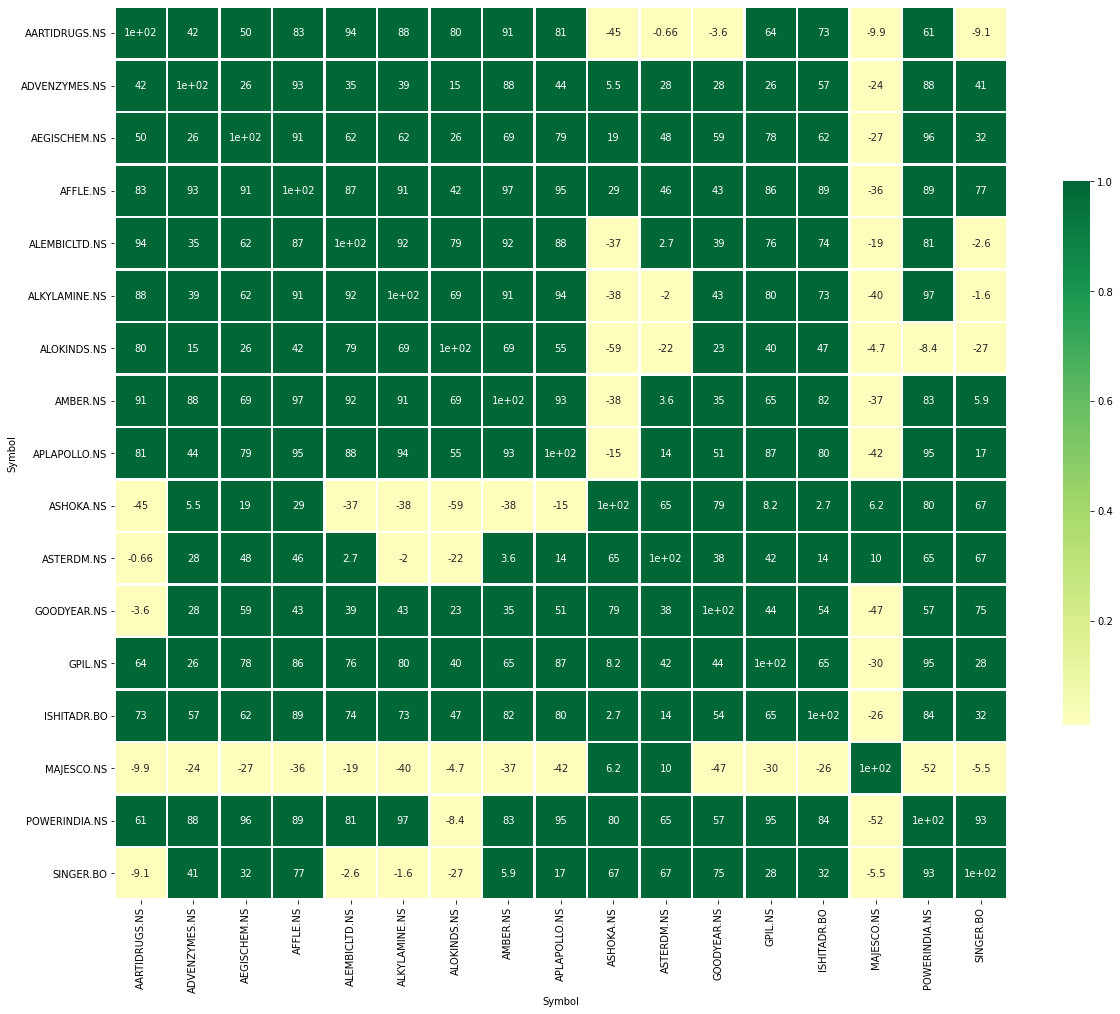

In [ ]:
import numpy as np
import pandas as pd
  #used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
  #to visualize the results
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()
#select start date for correlation window as well as list of tickers
assets=['MAJESCO.NS', 'SINGER.BO', 'GOODYEAR.NS', 'ISHITADR.BO', 'GPIL.NS','POWERINDIA.NS','APLAPOLLO.NS','AARTIDRUGS.NS','ADVENZYMES.NS','AEGISCHEM.NS','AFFLE.NS','ALEMBICLTD.NS',
                'ALKYLAMINE.NS','ALOKINDS.NS','AMBER.NS','ASHOKA.NS','ASTERDM.NS', ]

print('Enter date start date in: yy-mm-dd')
startdate= input()
today= datetime.today().strftime('%Y-%m-%d')
#array to store prices.
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in assets: 
    r = pdr.get_data_yahoo(ticker, start=startdate, end=today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()*100

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

dp = pd.DataFrame(df_pivot)
print(dp.head())
cor_matrix = dp.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)

list_1 = to_drop
list_2 = assets


for element in list_1:
    if element in list_2:
        list_2.remove(element)

print(list_2)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1, vmin=0.01 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Symbol       Date  AARTIDRUGS.NS  ...  ISHITADR.BO  MAJESCO.NS
0      2015-01-01     109.181252  ...    17.250000         NaN
1      2015-01-02     119.250000  ...    17.100000         NaN
2      2015-01-05     119.343750  ...    16.650000         NaN
3      2015-01-06     114.206253  ...    16.200001        

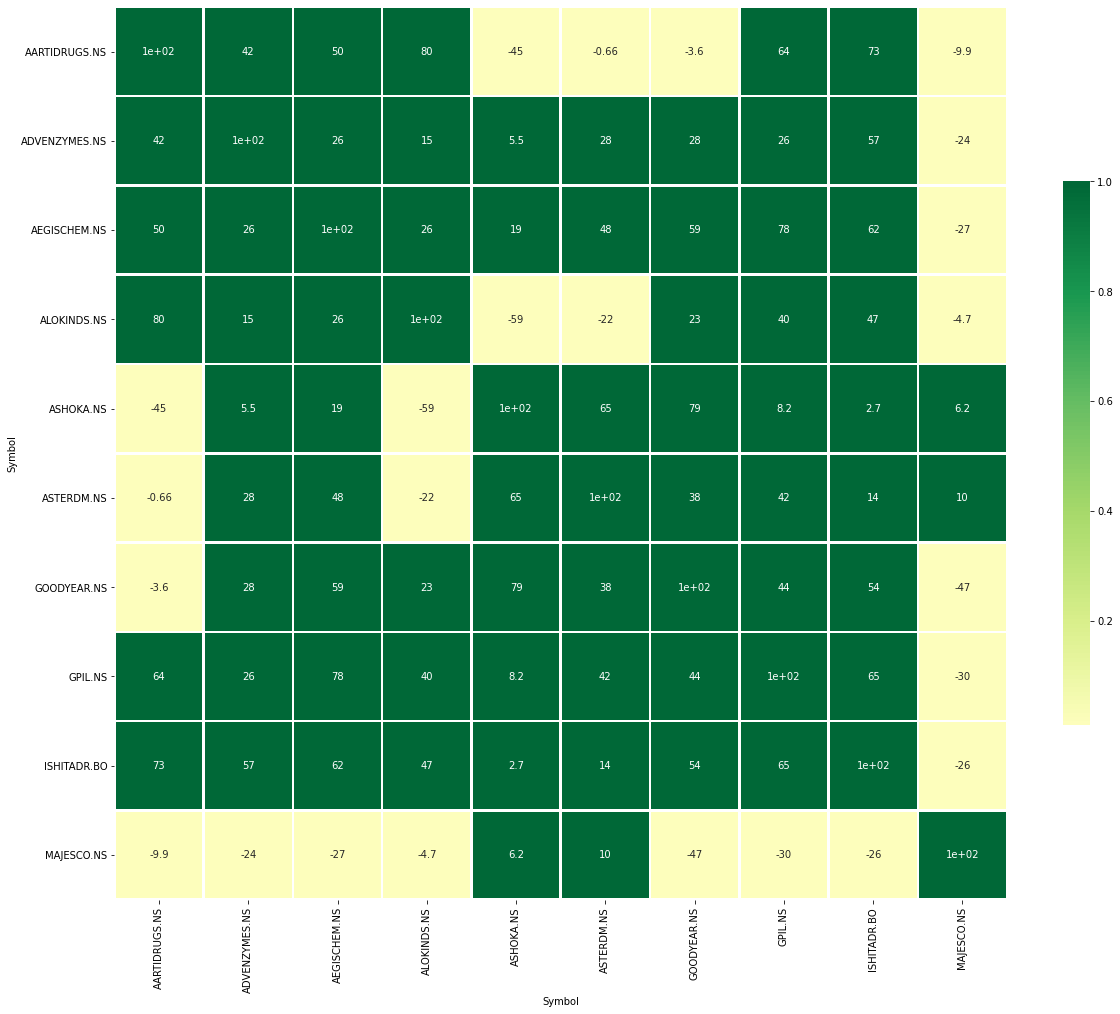

In [ ]:
#array to store prices.
symbols1=[]

#pull price using iex for each symbol in list defined above
for ticker in list_2: 
    r = pdr.get_data_yahoo(ticker, start=startdate, end=today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols1.append(r)

# concatenate into df
df = pd.concat(symbols1)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()*100

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

dp = pd.DataFrame(df_pivot)
print(dp.head())
cor_matrix = dp.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop_1 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(); print(to_drop_1)

list_3 = to_drop_1
list_4 = list_2


for element in list_3:
    if element in list_4:
        list_4.remove(element)

print(list_4)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1, vmin=0.01 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()


In [ ]:

#array to store prices.
symbols2=[]

#pull price using iex for each symbol in list defined above
for ticker in list_4: 
    r = pdr.get_data_yahoo(ticker, start=startdate, end=today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols2.append(r)

print(symbols2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[                  Open        High         Low  ...  Adj Close  Volume      Symbol
Date                                            ...                               
2015-08-19  316.000000  331.799988  305.000000  ...   3.860798  238113  MAJESCO.NS
2015-08-20  348.350006  348.350006  348.350006  ...   4.053373   45692  MAJESCO.NS
2015-08-21  353.000000  362.899994  330.950012

Symbol       Date  AARTIDRUGS.NS  ...  ISHITADR.BO  MAJESCO.NS
0      2015-01-01     109.181252  ...    17.250000         NaN
1      2015-01-02     119.250000  ...    17.100000         NaN
2      2015-01-05     119.343750  ...    16.650000         NaN
3      2015-01-06     114.206253  ...    16.200001         NaN
4      2015-01-07     113.387497  ...    16.400000         NaN

[5 rows x 10 columns]
Symbol         AARTIDRUGS.NS  ADVENZYMES.NS  ...  ISHITADR.BO  MAJESCO.NS
Symbol                                       ...                         
AARTIDRUGS.NS       1.000000       0.420298  ...     0.728467    0.098502
ADVENZYMES.NS       0.420298       1.000000  ...     0.572895    0.238782
AEGISCHEM.NS        0.496960       0.262845  ...     0.623200    0.268310
ASHOKA.NS           0.454906       0.054716  ...     0.027069    0.062302
ASTERDM.NS          0.006629       0.279858  ...     0.136538    0.101352
GOODYEAR.NS         0.036004       0.278639  ...     0.540420    0.472383
GPIL.NS

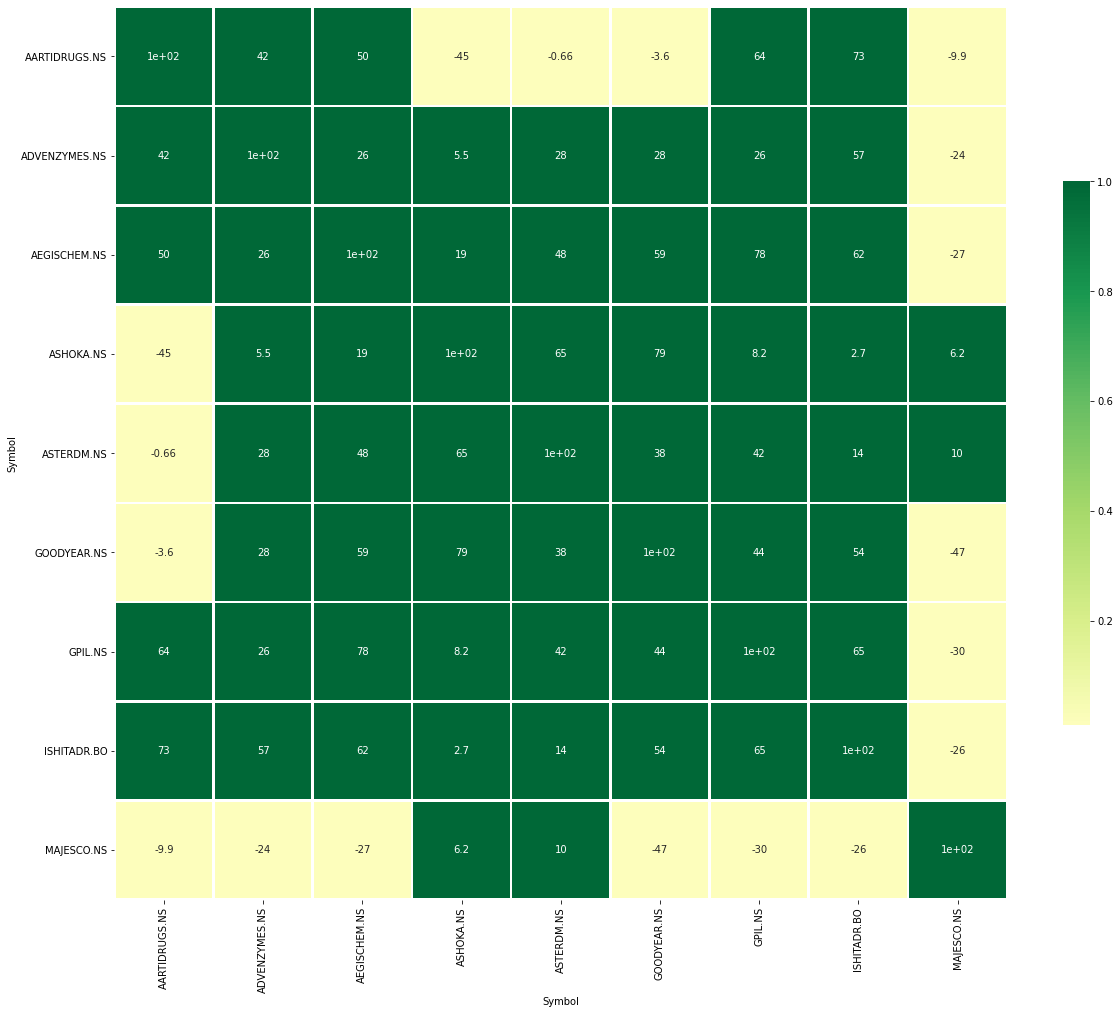

In [ ]:


# concatenate into df
df = pd.concat(symbols2)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()*100

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

dp = pd.DataFrame(df_pivot)
print(dp.head())
cor_matrix = dp.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop_3 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop_3)

list_5 = to_drop_3
list_6 = list_4


for element in list_5:
    if element in list_6:
        list_6.remove(element)

print(list_6)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1, vmin=0.01 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()